In [237]:
import matplotlib.pyplot as plt
import pandas as pd

In [238]:
#Mudar o PATH da sua máquina
countryData = pd.read_csv("C:\\Users\\PP\\Downloads\\countries_data.csv").drop("Unnamed: 0", axis = 1)
countryData

,country,year,Access to electricity,Electricity production(coal),Energy use per capita,co2 emissions,Inflation,Exports,GDP Growth(Annual),GDP Per Capita (USD)
0,BGD,2011,59.599998,1.873032,212.058286,72.875055,NaN,NaN,NaN,NaN
1,BGD,2012,66.155571,1.927433,219.972662,71.993094,6.217504,12.532259,6.521459,883.117130
2,BGD,2013,61.500000,2.306099,222.061405,71.590639,7.530406,2.451884,6.013606,981.860851
3,BGD,2014,62.400002,1.969738,229.250540,72.052527,6.991639,3.201149,6.061059,1118.873808
4,BGD,2015,74.903740,1.689516,NaN,68.045893,6.194280,-2.829990,6.552640,1248.453310
...,...,...,...,...,...,...,...,...,...,...
103,USA,2017,100.000000,NaN,NaN,NaN,2.130110,4.077911,2.332679,60109.655726
104,USA,2018,100.000000,NaN,NaN,NaN,2.442583,2.811103,2.996464,63064.418410
105,USA,2019,100.000000,NaN,NaN,NaN,1.812210,-0.065189,2.161177,65279.529026
106,USA,2020,100.000000,NaN,NaN,NaN,1.233584,-13.562815,-3.404592,63206.521077


In [239]:
def separacaoRegiao(countryData, coluna):
    regions = ["Norte America", "Asia", "Africa", "Sul da Asia"]
    countryPerData = countryData[["country", coluna]].dropna()
    countryPerData = countryPerData.groupby("country").sum()
    countryPerData = [countryPerData[coluna].iloc[1] + countryPerData[coluna].iloc[9],
                    countryPerData[coluna].iloc[2] + countryPerData[coluna].iloc[5],
                    countryPerData[coluna].iloc[3] + countryPerData[coluna].iloc[6] + countryPerData[coluna].iloc[7],
                    countryPerData[coluna].iloc[0] + countryPerData[coluna].iloc[4] + countryPerData[coluna].iloc[8]]
    return regions, countryPerData




def criandoGraficoPizza(countryData):
    

In [240]:
country = []
for x in countryData.loc[:, "country"]:
  if not x in country: country.append(x)
country

['BGD', 'CAN', 'CHN', 'GHA', 'IND', 'JPN', 'KEN', 'NGA', 'PAK', 'USA']

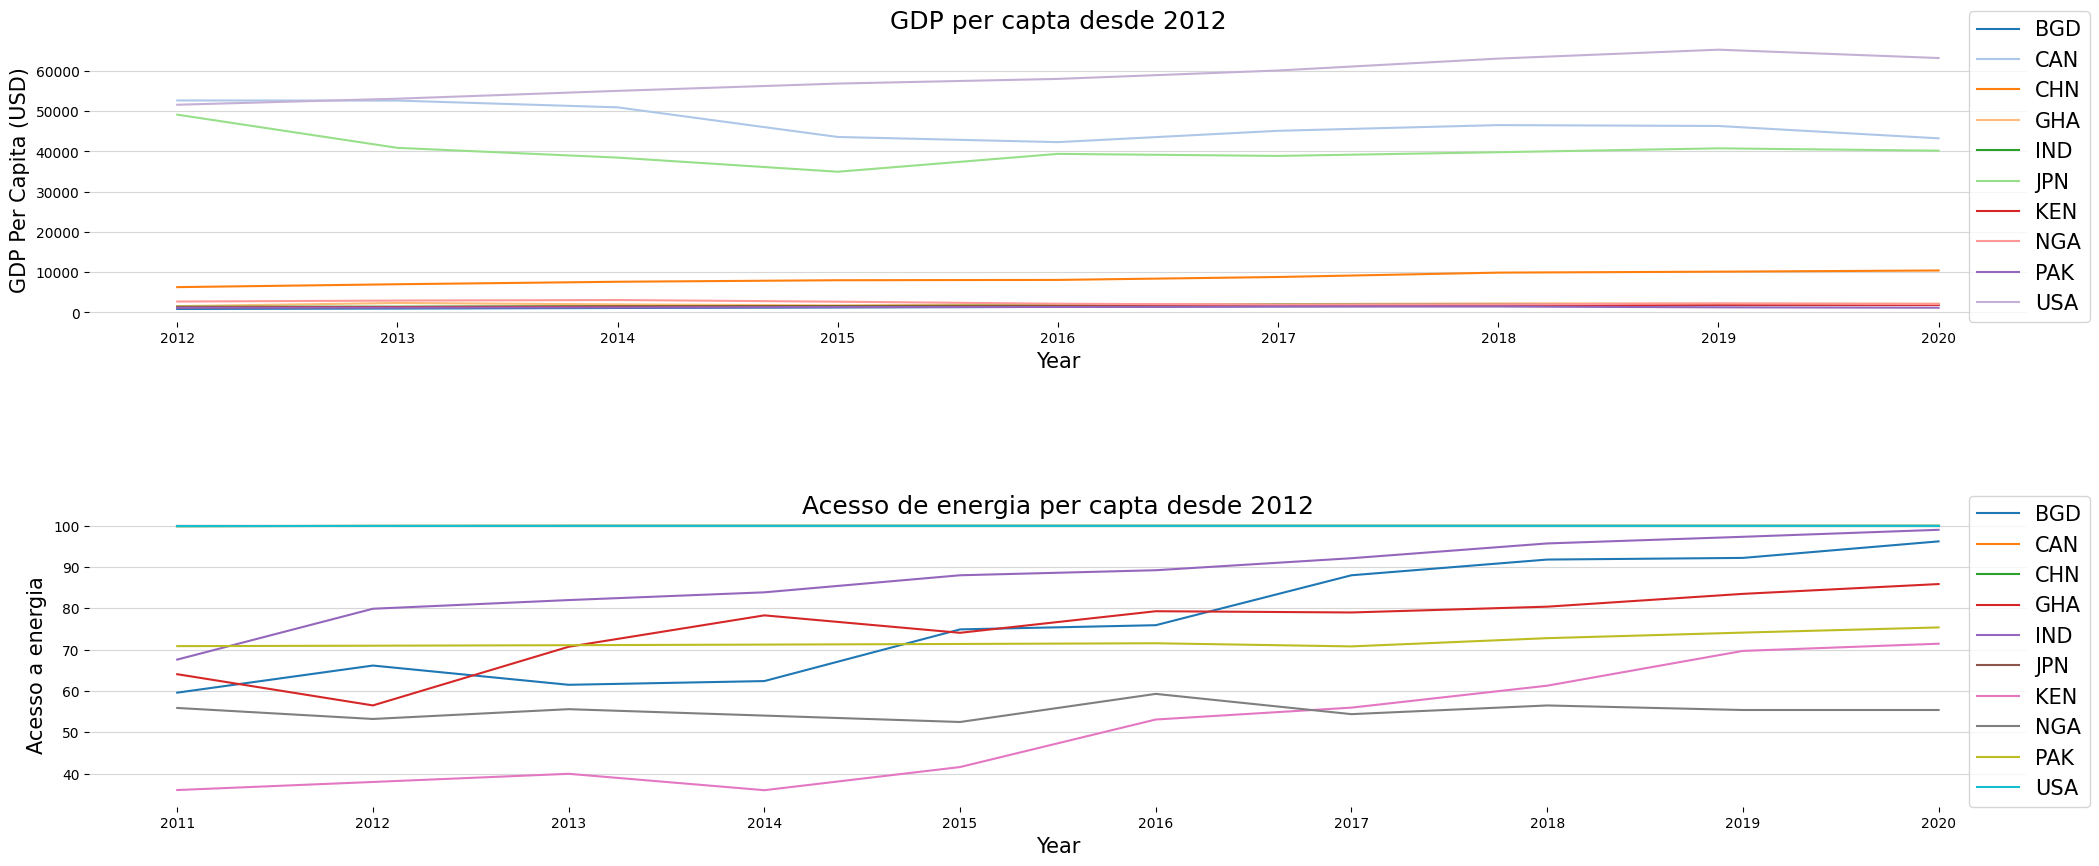

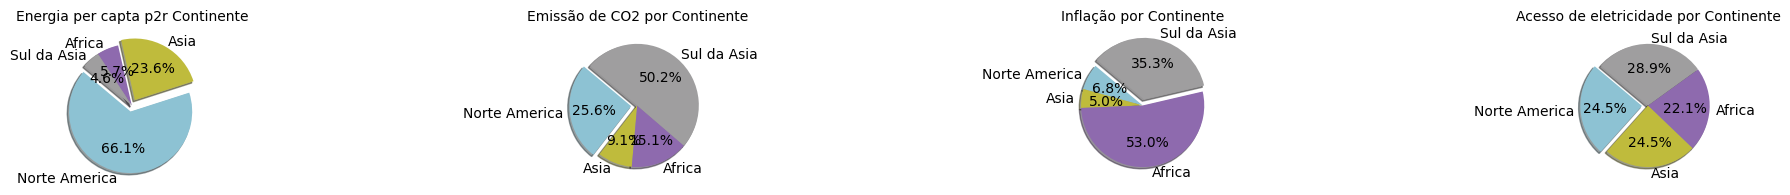

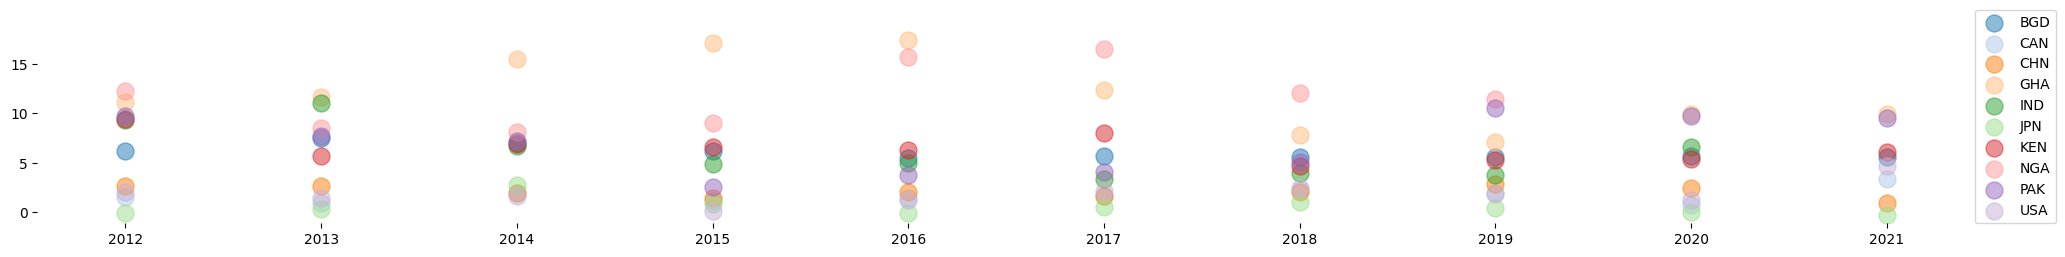

In [311]:
#Gráfico de GDP per capta
dimensao, dash1 = plt.subplots(2, 1, figsize = (25, 10))
plt.subplots_adjust(hspace = 0.7)
for pos, paises in enumerate(country):
    dash1[0].plot(countryData.loc[countryData["country"] == paises, "year"], countryData.loc[countryData["country"] == paises, "GDP Per Capita (USD)"], label = paises, color = plt.cm.tab20(pos))
dash1[0].set_xlabel("Year", fontsize = 15)
dash1[0].set_ylabel("GDP Per Capita (USD)", fontsize = 15)
dash1[0].set_title("GDP per capta desde 2012", fontsize = 18)
dash1[0].legend(loc=(0.97, 0), prop = {"size": 15})
dash1[0].spines["top"].set_visible(False)
dash1[0].spines["right"].set_visible(False)
dash1[0].spines["left"].set_visible(False)
dash1[0].spines["bottom"].set_visible(False)
dash1[0].grid(axis = "y", alpha = 0.5)


#Gáfico de acesso a eletricidade dos países desde 2012
for pos, paises in enumerate(country):
    dash1[1].plot(countryData.loc[countryData["country"] == paises, "year"], countryData.loc[countryData["country"] == paises, "Access to electricity"], label = paises, color = plt.cm.tab10(pos))
dash1[1].legend(loc = (0.97, 0), prop = {"size": 15})
dash1[1].spines["top"].set_visible(False)
dash1[1].spines["bottom"].set_visible(False)
dash1[1].spines["right"].set_visible(False)
dash1[1].spines["left"].set_visible(False)
dash1[1].grid(axis = "y", alpha = 0.5)
dash1[1].set_ylim(32, 101)
dash1[1].set_xticks(range(2011, 2021, 1))
dash1[1].set_title("Acesso de energia per capta desde 2012", fontsize = 18)
dash1[1].set_xlabel("Year", fontsize = 15)
dash1[1].set_ylabel("Acesso a energia", fontsize = 15)



#GRÁFICOS DE PIZZA
    #Gáfico de pizza 1
regions, countryPerData = separacaoRegiao(countryData, "Energy use per capita")
color = ["#8DC2D3", "#BFBB3C", "#8E6AAE", "#9F9E9F"]


dimensao, dash = plt.subplots(1, 4, figsize = (25, 2))
plt.subplots_adjust(hspace = 2)
dash[0].pie(countryPerData, explode=(0.1, 0.1, 0, 0), labels=regions, colors = color, autopct='%1.1f%%', shadow=True, startangle=140)
dash[0].set_title("Energia per capta p2r Continente", fontsize = 10)


        #Gáfico de pizza 2

regions, countryPerData = separacaoRegiao(countryData, "co2 emissions")
color = ["#8DC2D3", "#BFBB3C", "#8E6AAE", "#9F9E9F"]

dash[1].pie(countryPerData, explode=(0.1, 0, 0, 0), labels = regions, colors = color, autopct='%1.1f%%', shadow=True, startangle=140)
dash[1].set_title("Emissão de CO2 por Continente", fontsize = 10)


        #Gráfico de pizza 3
regions, countryPerData = separacaoRegiao(countryData, "Inflation")
color = ["#8DC2D3", "#BFBB3C", "#8E6AAE", "#9F9E9F"]

dash[2].pie(countryPerData, explode=(0, 0, 0, 0.1), labels = regions, colors = color, autopct='%1.1f%%', shadow=True, startangle=140)
dash[2].set_title("Inflação por Continente", fontsize = 10)


        #Gráfico de pizza 4
regions, countryPerData = separacaoRegiao(countryData, "Access to electricity")
color = ["#8DC2D3", "#BFBB3C", "#8E6AAE", "#9F9E9F"]

dash[3].pie(countryPerData, explode=(0.1, 0, 0, 0), labels = regions, colors = color, autopct='%1.1f%%', shadow=True, startangle=140)
dash[3].set_title("Acesso de eletricidade por Continente", fontsize = 10)



#GRÁFICO DE INFLAÇÃO POR CONTINENTE
plt.figure(figsize=(25, 2.5))
for i, pais in enumerate(country):
    plt.scatter(countryData.loc[countryData['country'] == pais, "year"], countryData.loc[countryData['country'] == pais, 'Inflation'], alpha = 0.5, color=plt.cm.tab20(i), label=pais, s=150)
plt.gca().spines["right"].set_visible(False)
plt.gca().spines["bottom"].set_visible(False)
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["left"].set_visible(False)
plt.xticks(range(2012, 2022, 1))
plt.legend(loc = (1, 0))


plt.show()